# Plotting active learning

Imports

### Plot results.

In [36]:
import pandas as pd
import os
rep = 'GraphConv'
home_dir = './results/comparison_results/'
home_dir_list = os.listdir(home_dir)

folders = [h for h in home_dir_list if 'gp' in h]
paths = [f'{home_dir}/{f}/best_{rep}_Adam.csv' for f in folders]
best_df_mle = pd.concat([pd.read_csv(p, index_col=0) for p in paths])
best_df_mle['Number of Candidates Acquired'] = best_df_mle['Step']

folders = [h for h in home_dir_list if 'mle' in h]
paths = [f'{home_dir}/{f}/best_{rep}_Adam.csv' for f in folders]
best_df_gp = pd.concat([pd.read_csv(p, index_col=0) for p in paths])
best_df_gp['Number of Candidates Acquired'] = best_df_gp['Step']

# fix column titles
best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'random'] = 'Random'
best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'expected improvement'] = 'Expected Improvement'
best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'probability of improvement'] = 'Probability of Improvement'
best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'upper confidence bound'] = 'Upper Confidence Bound'

Bringing them together.

In [37]:
best_df_mle['type'] = 'MLE'
best_df_gp['type'] = 'GP'
best_df = pd.concat([best_df_mle, best_df_gp])

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style("white")
sns.set_palette('tab10')
sns.set_style("ticks")

from matplotlib import cm as cm
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots()

# plt.figure(figsize=(4, 3)) # (20, 10)
g = sns.lineplot(x="Number of Candidates Acquired", y="Best Solubility", hue="Acquisition Function",
                  data=best_df, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.set(ylabel='Best Solubility [log(mol/L)]')
# ax.tight_layout()
print('saving!')
fig.savefig(f'acqfn_{rep}_Adam_q10.png', dpi=500)

# g.legend(loc='center right', bbox_to_anchor=(1.85, 0.5), ncol=1)

# plt.figure(figsize=(4, 3)) # (20, 10)
# g = sns.lineplot(x="Step", y="Cumulative Regret", hue="Acquisition Function",
#                   data=best_df)
# # g.legend(loc='center right', bbox_to_anchor=(1.85, 0.5), ncol=1)

Grid format!

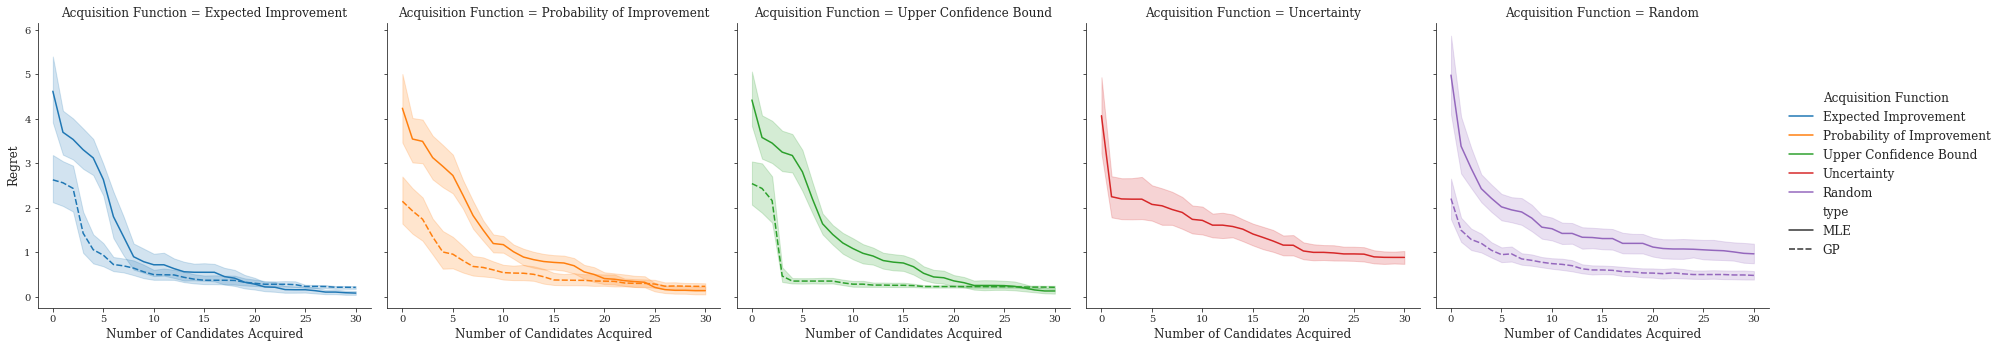

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm as cm
colors = plt.get_cmap('tab10')
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.set_palette('tab10')

plot = sns.relplot(x="Number of Candidates Acquired", y="Regret",
                   col="Acquisition Function", hue="Acquisition Function",
                   kind="line",
                   style="type", # comment out if not comparing
                   data=best_df)
ax = plot.axes[0][0]
h, l = ax.get_legend_handles_labels()
print(ax.legend_)
plot.add_legend(handles=h[-2:], labels=l[-2:])
# plot.fig.legend(h,l, ncol=2) # you can specify any location parameter you want here


# for t, l in zip(g._legend.texts, new_labels):
    

# plt.figure()
# g = sns.relplot(x="Number of Candidates Acquired", y="Best Solubility",
#                  col="Acquisition Function", hue="Acquisition Function",
#                  kind="line", data=best_df)

In [137]:
plot.fig.legends

IndexError: pop from empty list

In [68]:
handles[-2:]

[]

In [53]:
g._legend.get_children()[0].get_children()